## Jack's FIFA 22 dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
fifa_22 = pd.read_csv("files/fifa_22.csv")
fifa_21 = pd.read_csv("files/fifa_21.csv")
fifa_20 = pd.read_csv("files/fifa_20.csv")

/Users/JackReynolds/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
print(fifa_22.shape), print(fifa_21.shape), print(fifa_20.shape)

(19239, 110)
(18944, 110)
(18483, 110)


(None, None, None)

In [39]:
fifa_22_clean = fifa_22.drop(['sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url'], axis=1) 
fifa_21_clean = fifa_21.drop(['sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url'], axis=1) 
fifa_20_clean = fifa_20.drop(['sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url'], axis=1) 


In [41]:
print(fifa_22_clean.shape)

(19239, 61)


In [42]:
fifa_22_clean.head()

,short_name,player_positions,overall,potential,wage_eur,age,height_cm,weight_kg,club_name,league_name,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,"RW, ST, CF",93,93,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,...,96,20,35,24,6,11,15,14,8,NaN
1,R. Lewandowski,ST,92,92,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,...,88,35,42,19,15,6,12,8,10,NaN
2,Cristiano Ronaldo,"ST, LW",91,91,270000.0,36,187,83,Manchester United,English Premier League,...,95,24,32,24,7,11,15,14,11,NaN
3,Neymar Jr,"LW, CAM",91,91,270000.0,29,175,68,Paris Saint-Germain,French Ligue 1,...,93,35,32,29,9,9,15,15,11,NaN
4,K. De Bruyne,"CM, CAM",91,91,350000.0,30,181,70,Manchester City,English Premier League,...,89,68,65,53,15,13,5,10,13,NaN


In [50]:
def label_pos (row):
    
    if(row.club_position == "RB" or row.team_position == "CB" or row.team_position == "LB" or 
       row.club_position == "LWB" or row.team_position == "RCB"or row.team_position == "RWB" or 
       row.club_position == "LCB"):
        return 'Defender'
    if(row.club_position == "RM" or row.team_position == "CM" or row.team_position == "LM"
       or row.club_position == "CAM" or row.team_position == "LDM" or row.team_position == "RDM"
      or row.club_position == "LAM"or row.team_position == "RAM" or row.team_position == "CDM"
       or row.club_position == "RCM"or row.team_position == "LCM"):
        return 'MidFielder'
    if(row.club_position == "RW" or row.team_position == "CF" or row.team_position == "LW" or 
       row.club_position == "ST" or row.team_position == "RS"or row.team_position == "LS"
       or row.club_position == "LF"or row.team_position == "RF"):
        return 'Forward'
    if (row.club_position == "SUB"):
        return 'Substitute'
    if (row.club_position == "RES"):
        return 'Reserve'
    return "other"

fifa_21_clean['field_position'] = fifa_21_clean.apply (lambda row: label_pos(row), axis=1)

AttributeError: 'Series' object has no attribute 'team_position'

In [26]:
def country(x):
    return fifa_22_clean[fifa_22_clean['nationality_name'] == x][['short_name','overall','potential','club_position']]

# Australian Players
##country('Australia')


In [27]:
# Australian Players
country('Australia')

,short_name,overall,potential,club_position
912,A. Mooy,77,77,CM
922,M. Ryan,77,79,SUB
1284,J. Maclaren,76,76,ST
1988,D. Vukovic,74,74,SUB
2656,C. Goodwin,73,73,LM
...,...,...,...,...
19089,B. McMorrow,50,62,SUB
19090,A. Popovic,50,67,SUB
19111,R. Borges Rodrigues,49,67,SUB
19142,C. Talbot,49,64,RES


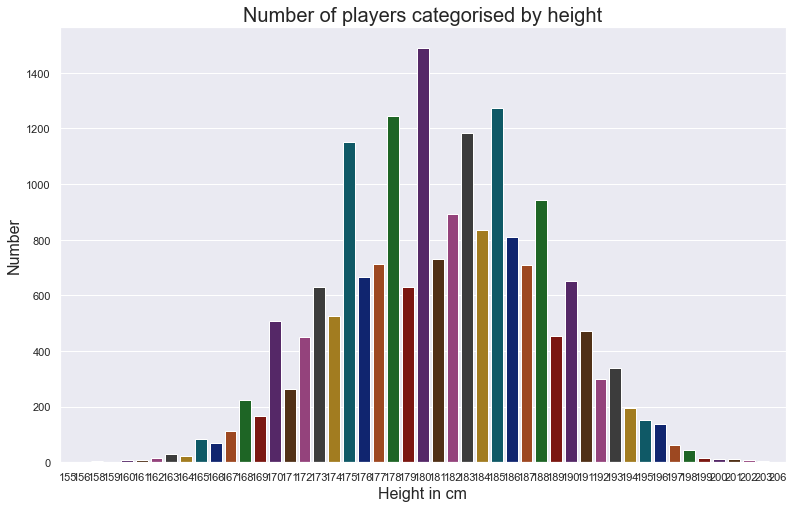

In [30]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'height_cm', data = fifa_22_clean, palette = 'dark')
ax.set_title(label = 'Number of players categorised by height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in cm', fontsize = 16)
ax.set_ylabel(ylabel = 'Number', fontsize = 16)
plt.show()

In [ ]:
plt.figure(figsize = (20, 5))
sns.distplot(data['Weight'], color = 'pink')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

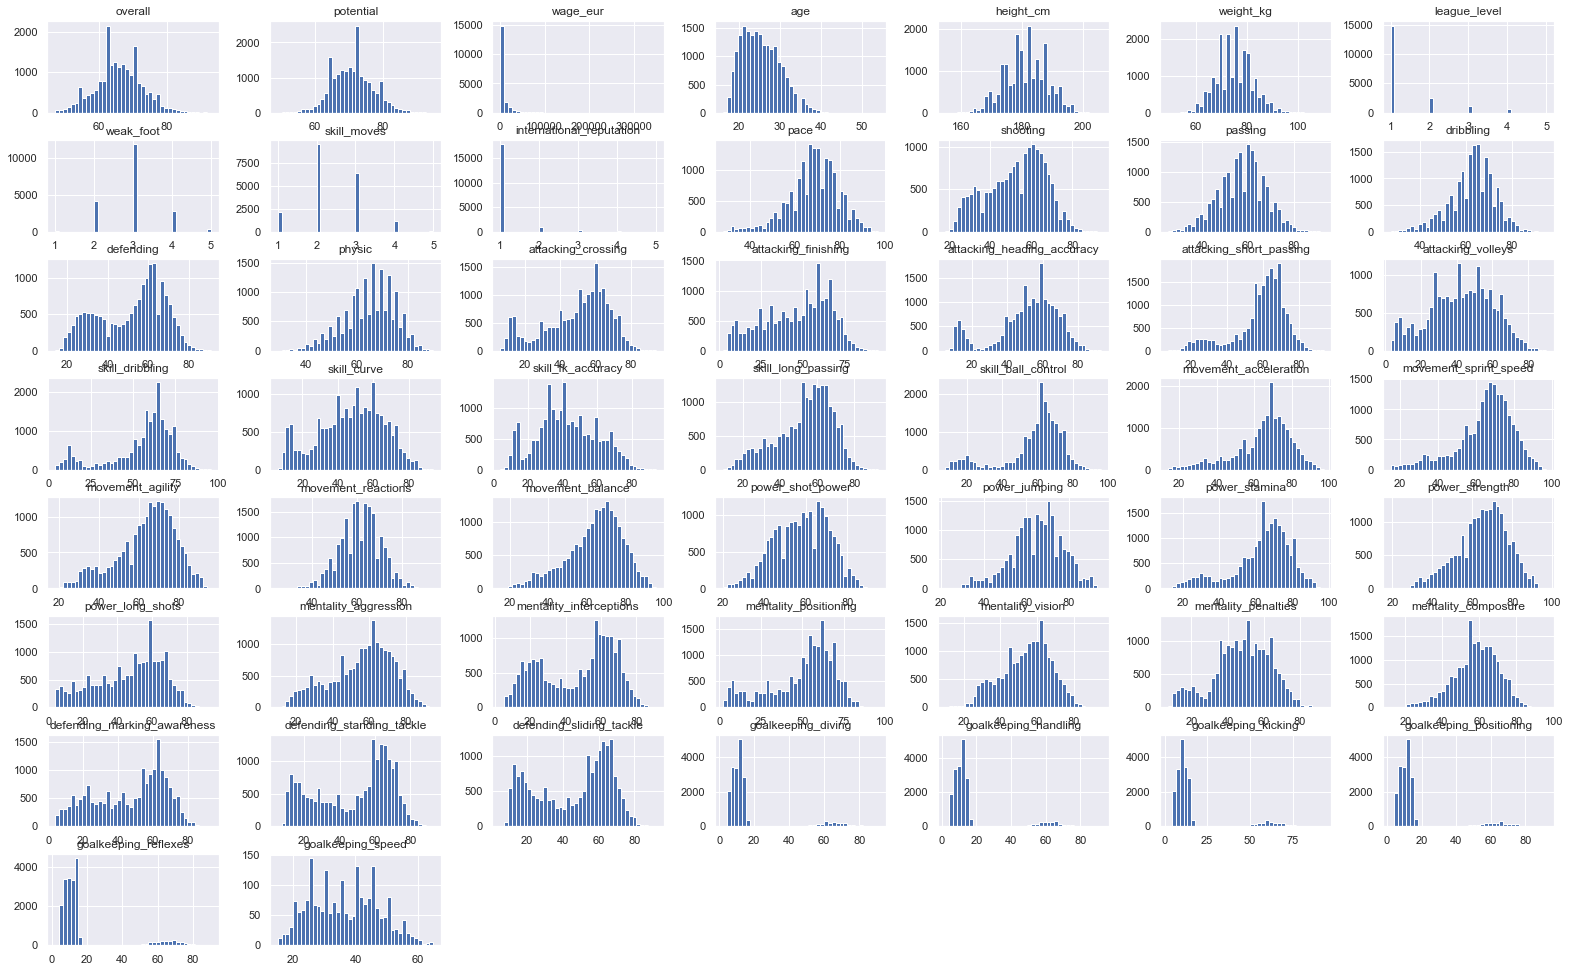

In [31]:
fifa_22_clean.hist(bins=40, figsize=(27, 17))
plt.show()